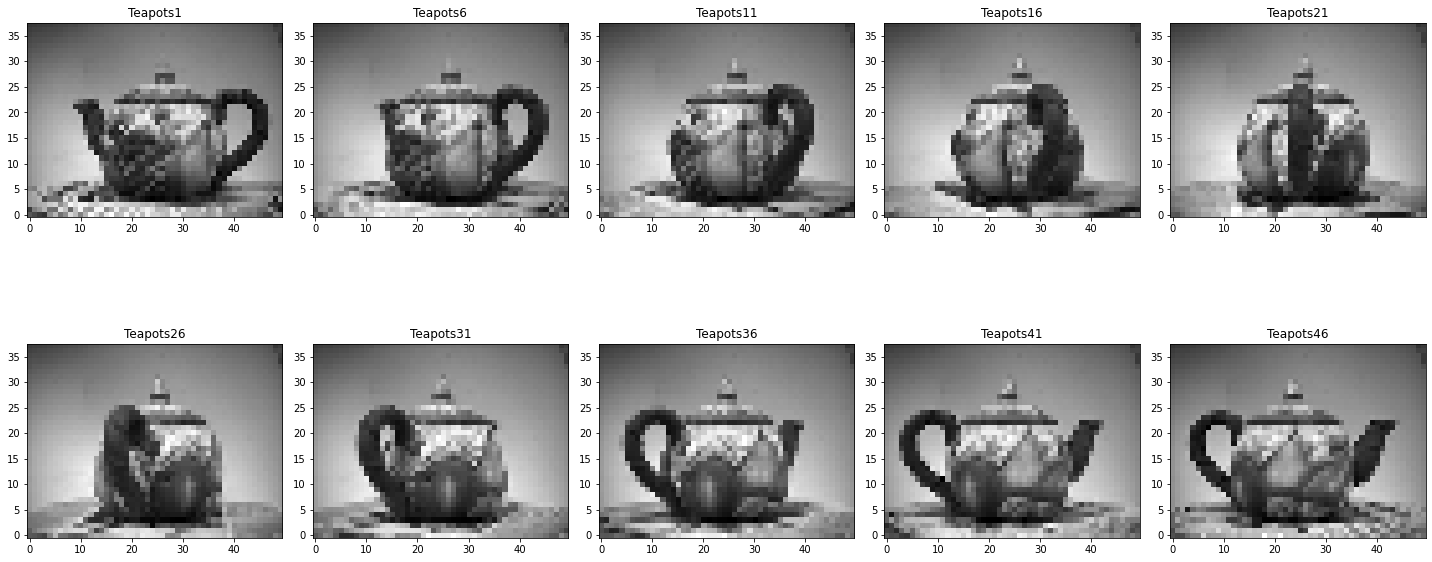

In [1]:
import numpy as np
import plotly.io as pio
import plotly.graph_objs as go

from plotly import subplots

from scipy import io
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import statistics
from matplotlib import cm

IMG = io.loadmat('teapots.mat')
X = pd.DataFrame(IMG['teapotImages']).to_numpy()
axes = []
rows = 2
cols = 5
count=0

fig=plt.figure(figsize=(20, 10))
for a in range(rows*cols):
    axes.append(fig.add_subplot(rows, cols, a+1) )
    subplot_title=("Teapots"+str(count+1))
    axes[-1].set_title(subplot_title)  
    image_sample = X[count,:].reshape(50,38)
    plt.imshow(np.rot90(image_sample), origin="lower", cmap = 'gray')
    count+=5
fig.tight_layout()    
plt.show()

Text(0.5, 1.0, 'Mean')

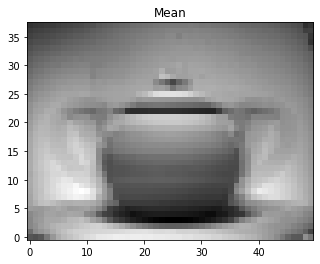

In [2]:
mu=np.mean(X,axis=0)
Xbar=(X-mu)
std=np.std(Xbar,axis=0)

image_sample = mu.reshape(50,38)
plt.imshow(np.rot90(image_sample), origin="lower", cmap = 'gray')
plt.title("Mean")

1900
4.1468712436568245 2.9370673656063 2.0240765544469275


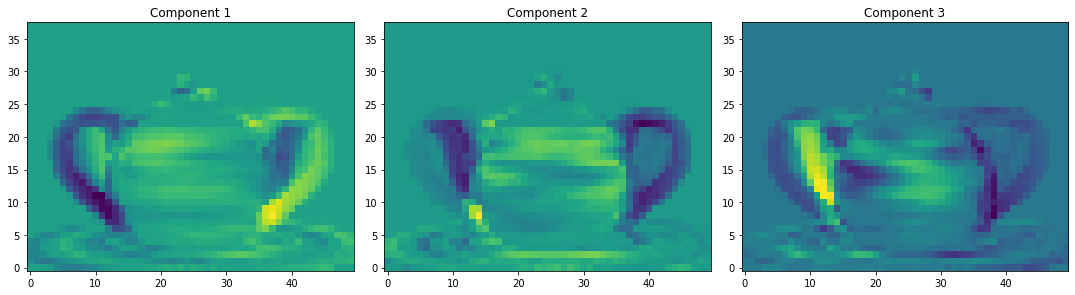

In [11]:
recon_values = []
max_components = len(X.T)

c = np.cov(Xbar.T)
sigma = np.round(c, 2)

eig_vals, eig_vecs = np.linalg.eigh(sigma)  
print(len(eig_vecs[0]))
sorted_eig  = np.argsort(-eig_vals)
eig_val = eig_vals[sorted_eig]
print(eig_val[0], eig_val[1], eig_val[2])
eig_vec = eig_vecs[:,sorted_eig]

eig_vector = eig_vec[:, :3]
projection_matrix = np.dot(eig_vector, eig_vector.T)
recon_values = np.dot(Xbar, projection_matrix)
axes = []
count = 0
fig=plt.figure(figsize=(20, 10))
for a in range(0,3):
    axes.append(fig.add_subplot(1, 4, a+1) )
    subplot_title=("Component "+str(a+1))
    axes[-1].set_title(subplot_title)  
    image_sample = eig_vector[:,count].reshape(50,38)
    plt.imshow(np.rot90(image_sample), origin="lower")
    count+=1
fig.tight_layout()
plt.show()

In [ ]:
recon_values = np.asarray(recon_values)
recon_values = recon_values * std + Xbar
fig=plt.figure(figsize=(20, 10))
num = 0
for a in range(rows*cols):
    axes.append(fig.add_subplot(rows, cols, a+1) )
    subplot_title=("Teapot"+str(num+1))
    axes[-1].set_title(subplot_title)  
    image_sample = recon_values[num, :].reshape(50,38)
    plt.imshow(np.rot90(image_sample), origin="lower", cmap = 'gray')
    num += 5
fig.tight_layout()
plt.show()